<a href="https://colab.research.google.com/github/bangpc/Region_Growing_and_Region_Merging_Segmentation/blob/master/python/Region_Merging_Segmentation/Region_merging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#@markdown Upload image to colab
from google.colab import files
uploaded = files.upload()

Saving X2kkz.jpg to X2kkz.jpg
Saving Chittagong_Bypass_to_N1,_September_2009.jpg to Chittagong_Bypass_to_N1,_September_2009.jpg
Saving winding_road_5.jpg to winding_road_5.jpg
Saving 1.jpg to 1.jpg


# Region merging segmentation image

In [63]:
import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt
from collections import deque
from google.colab.patches import cv2_imshow

In [110]:
imgOrig = cv2.imread('X2kkz.jpg',0)

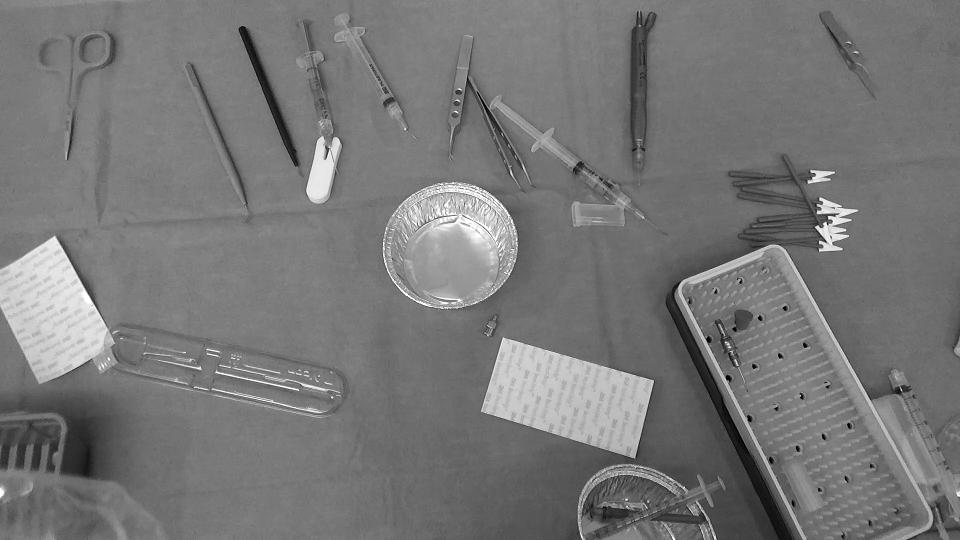

In [111]:
cv2_imshow(imgOrig)

In [112]:
gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
row,col =gray.shape;

In [113]:
nRow = row*2
nCol = col*2

In [114]:
crackImg = np.zeros((nRow,nCol))
crackImg3 = np.zeros((nRow,nCol,3))

In [115]:
i_img,j_img = 0,0
for i in range(nRow):
    for j in range(nCol):
        if(i % 2 == 0 and j % 2 == 0 and i_img < row and j_img < col):
            crackImg[i][j] = gray[i_img][j_img]
            crackImg3[i][j] = imgOrig[i_img][j_img]            
            j_img += 1
    
    if(i % 2 == 0):
        i_img += 1 
        j_img = 0                 


In [116]:
#Update Magnitude
crackNewImg = np.zeros((nRow,nCol))

T1 = 20

for i in range(nRow):
    for j in range(nCol):
        if(i % 2 != 0 or j % 2 != 0):
            
            if(i == 0):
                up = 0
            else:
                up = crackImg3[i-1][j]
            
            if(i+1 == nRow):
                down = 0
            else:
                down = crackImg3[i+1][j]            
            
            if(j == 0):                
                left = 0
            else:
                left = crackImg3[i][j-1]   
                
            if(j+1 == nCol):         
                right = 0
            else:
                right = crackImg3[i][j+1]            
                
            crackNewImg[i][j] = sum(np.abs(np.sqrt(np.square(left-right)+np.square(up-down))))
            #crackNewImg[i][j] = 255
            if(crackNewImg[i][j] < T1):
               crackNewImg[i][j] = 0
            else:
               crackNewImg[i][j] = 255 
            #print i,',',j,':',crackNewImg[i][j]
        else:
            crackNewImg[i][j] = crackImg[i][j]

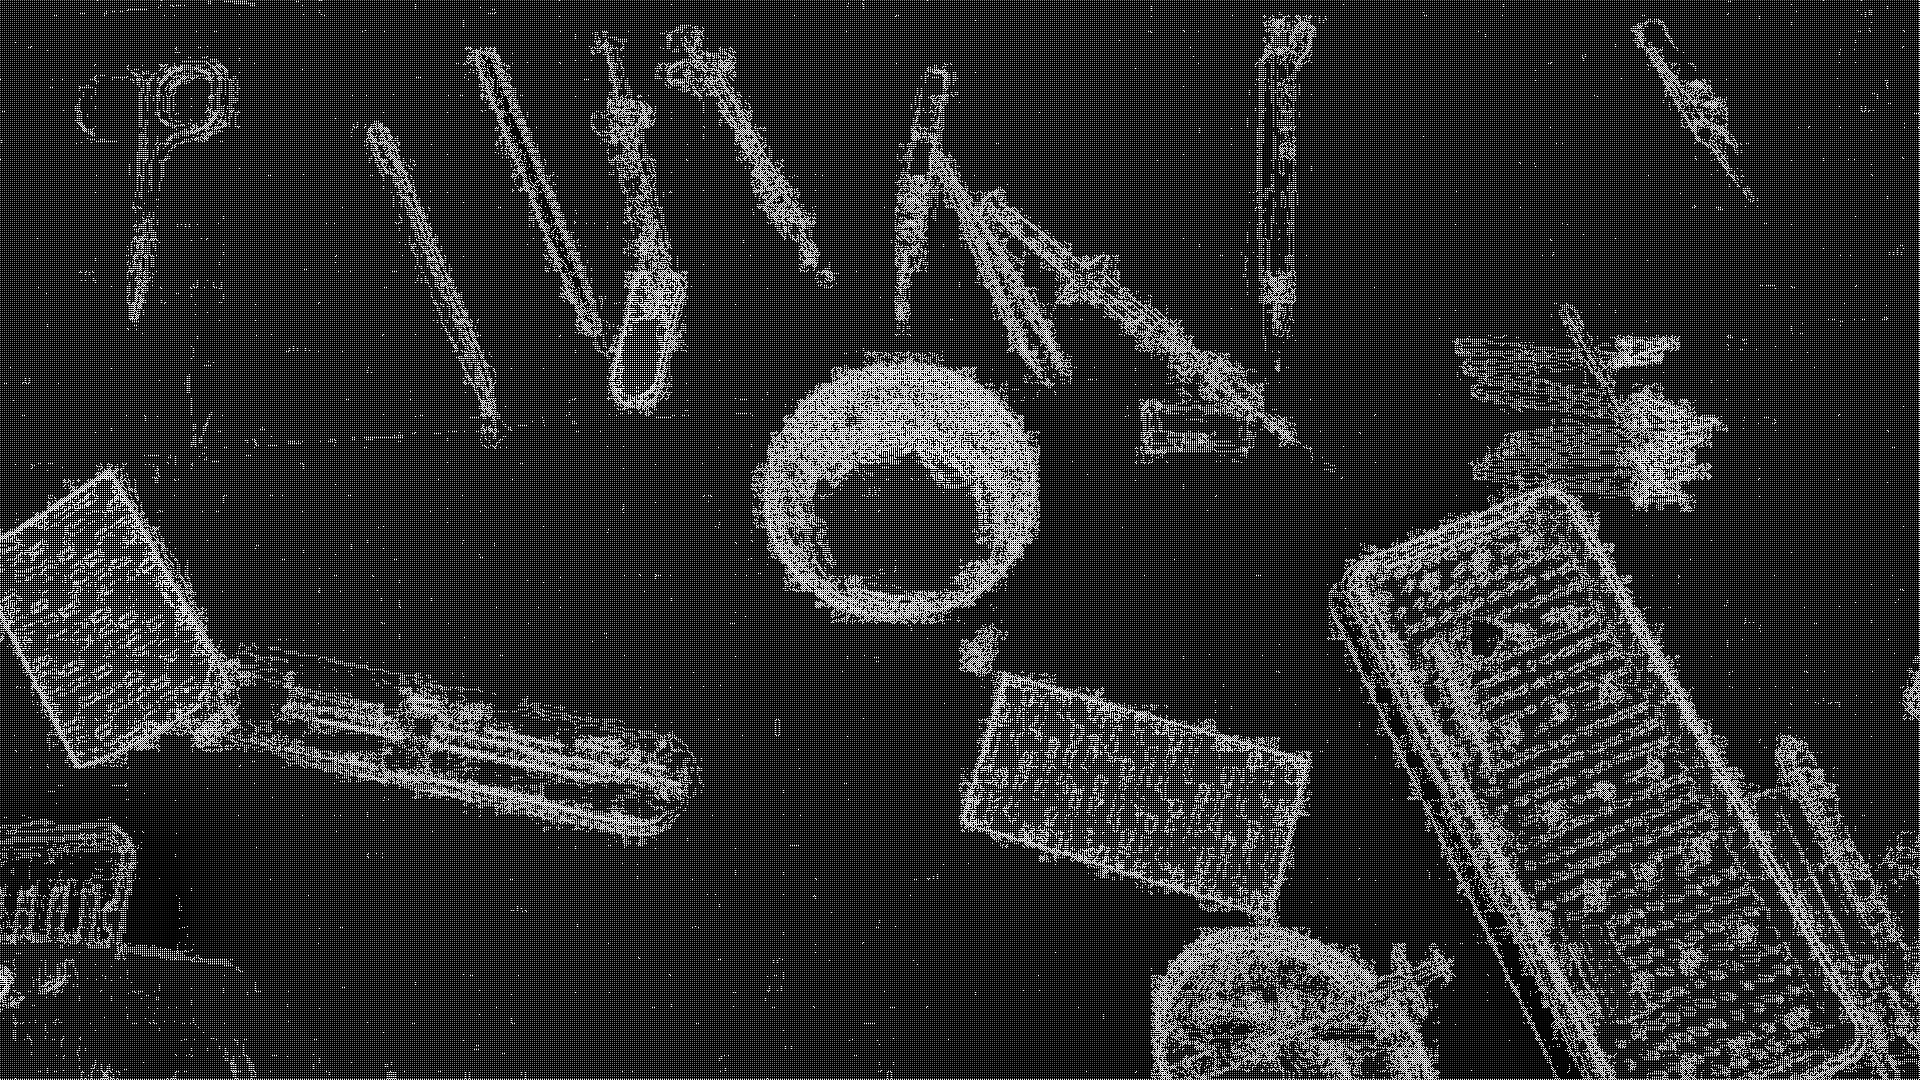

In [117]:
cv2_imshow(crackNewImg)

In [118]:
def mergeRegionsNew(region,p,re):    
    
    queue = deque()
    queue.append(p)
    while(len(queue) > 0):
        r = [p[0],p[1]+2]
        if (r[0] < nRow and r[1] < nCol and re[p[0]][p[1]+2] == 0 and crackNewImg[p[0]][p[1]+1] == 0):
            region.append(r)
            queue.append(r)
            re[p[0]][p[1]+2] = 1
                    
        b = [p[0]+2,p[1]]
        if (b[0] < nRow and b[1] < nCol and re[p[0]+2][p[1]] == 0 and crackNewImg[p[0]+1][p[1]] == 0):
            region.append(b)
            queue.append(b)            
            re[p[0]+2][p[1]] = 1

        a = [p[0]-2,p[1]]
        if (a[0] > 0 and a[1] > 0 and re[p[0]-2][p[1]] == 0 and crackNewImg[p[0]-1][p[1]] == 0):
            region.append(a)
            queue.append(a)   
            re[p[0]-2][p[1]] = 1
    
    
        l = [p[0],p[1]-2]
        if (l[0] > 0 and l[1] > 0 and re[p[0]][p[1]-2] == 0 and crackNewImg[p[0]][p[1]-1] == 0):
            region.append(l)
            queue.append(l)   
            re[p[0]][p[1]-2] = 1
        
        p = queue.popleft()

In [119]:
re = np.zeros((nRow,nCol))
print (nRow,nCol)

allregions = []
regions = {}
cnt = 0

1080 1920


In [120]:
for i in range(nRow):
    for j in range(nCol):
        region = []
        mergeRegionsNew(region,[i,j],re)
        if(len(region) > 0):
            regions[cnt] = region
            allregions.append(region)
            cnt += 1

In [121]:
# allregions = np.array(allregions)
newImage = np.full((nRow, nCol,3), 0)
color = None
colors = [25,50,75,100,125]

In [122]:
cnt = 0
for v in allregions:
    color = [0,0,0]
    for j in v:
        color += imgOrig[int(j[0]/2)][int(j[1]/2)]
    
    color = color/len(v)
    
    color = colors[cnt%5]
    for j in v:
        newImage[j[0]][j[1]] = color       
    cnt += 1


(Text(0.5, 1.0, 'Region Merging'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

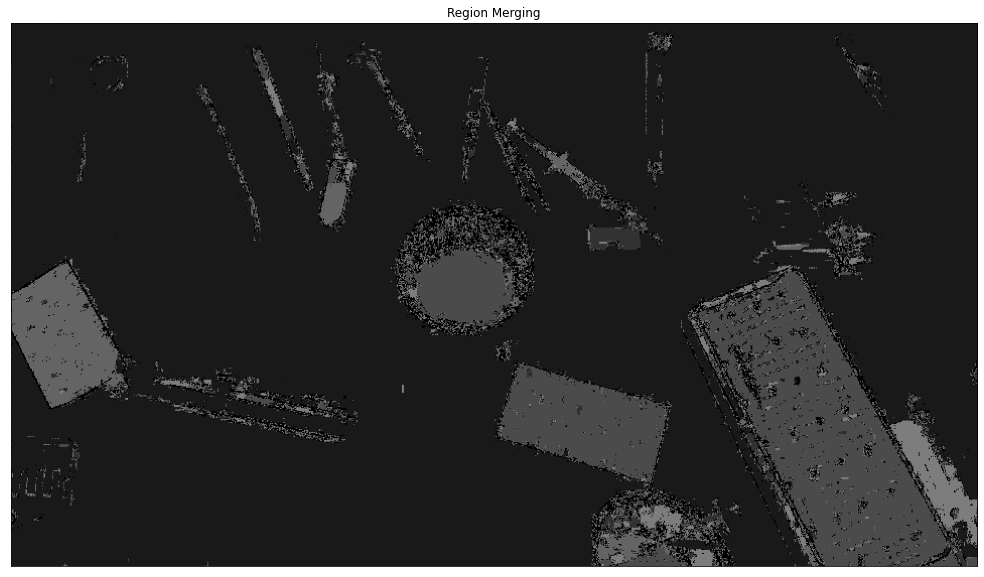

In [131]:
plt.figure(figsize=(20,10))
plt.imshow(newImage[::2,::2])
plt.title('Region Merging'), plt.xticks([]), plt.yticks([])

In [132]:
mergeImg = newImage[::2,::2]